# Assignement5: SPARQL queries


##Lobna Ramadane



Q1: 1 POINT  How many protein records are in UniProt? 

In [2]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

In [2]:
PREFIX uniprot:<http://purl.uniprot.org/uniprot/> 
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#>

SELECT (STR(COUNT(?protein)) as ?protein_count)
WHERE
{
?protein a up:Protein
}


protein_count
360157660


Q2: 1 POINT How many Arabidopsis thaliana protein records are in UniProt? 

In [3]:
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX taxon:<http://purl.uniprot.org/taxonomy/>

SELECT (STR(COUNT(?protein)) as ?count)

WHERE 
{
  			?protein a up:Protein;
           				up:organism taxon:3702
}


count
136782


Q3: 1 POINT retrieve pictures of Arabidopsis thaliana from UniProt? 


In [4]:
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX foaf:<http://xmlns.com/foaf/0.1/>

SELECT ?name ?image
WHERE {
       ?taxon    foaf:depiction  ?image .
       ?taxon    up:scientificName   ?name .
       FILTER(CONTAINS(?name, "Arabidopsis thaliana"))
}

name,image
Arabidopsis thaliana,https://upload.wikimedia.org/wikipedia/commons/3/39/Arabidopsis.jpg
Arabidopsis thaliana,https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Arabidopsis_thaliana_inflorescencias.jpg/800px-Arabidopsis_thaliana_inflorescencias.jpg


What is the description of the enzyme activity of UniProt Protein Q9SZZ8 

In [ ]:
PREFIX uniprot:<http://purl.uniprot.org/uniprot/> 
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#>

SELECT ?activity_label
WHERE
{
			uniprot:Q9SZZ8 a up:Protein ;
			 		up:enzyme ?enzyme.
			?enzyme up:activity ?activity.
    				?activity rdfs:label ?activity_label
}


activity_label
Beta-carotene + 4 reduced ferredoxin [iron-sulfur] cluster + 2 H(+) + 2 O(2) = zeaxanthin + 4 oxidized ferredoxin [iron-sulfur] cluster + 2 H(2)O.


Q5: 1 POINT:  Retrieve the proteins ids, and date of submission, for proteins that have been added to UniProt this year   (HINT Google for “SPARQL FILTER by date”)

In [33]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT ?protein ?date_sub
WHERE {
	?protein a up:Protein .
	?protein up:created ?date_sub .
    FILTER((xsd:date(?date_sub) >= "2021-01-01"^^xsd:date))
}
#I don't know why this doesn't work here I tried the same in sparql uniprot and got an output
#The output is uploaded in a csv

protein,date_sub


Q6: 1 POINT How  many species are in the UniProt taxonomy?

In [ ]:
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
PREFIX up:<http://purl.uniprot.org/core/> 

SELECT (COUNT(DISTINCT ?taxon) AS ?species) #
WHERE
{
  ?taxon a up:Taxon ;
           up:rank up:Species . 
}

species
2029846


Q7: 2 POINT  How many species have at least one protein record? (this might take a long time to execute, so do this one last!)

In [ ]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 

SELECT (COUNT (DISTINCT ?specie) AS ?count)

WHERE
{
  ?protein a up:Protein ;
    up:organism ?specie .
    
  ?specie a up:Taxon;
          up:rank up:Species .
  
}
#Because this one took too long i did it in https://sparql.uniprot.org/sparql/ 
#the result is 1057158


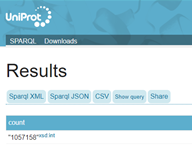

Q8: 3 points:  find the AGI codes and gene names for all Arabidopsis thaliana  proteins that have a protein function annotation description that mentions “pattern formation”

In [17]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 

SELECT ?agi ?gene_name
WHERE
{
  ?protein a up:Protein ;
            up:organism taxon:3702;
            up:encodedBy ?gene;
            up:annotation ?annotation.
  
  ?gene up:locusName ?agi ;
        skos:prefLabel ?gene_name .   
  
  ?annotation a up:Function_Annotation ;
                rdfs:comment ?description .
  
  FILTER CONTAINS (str(?description), 'pattern formation') .

}


agi_code,name


From the MetaNetX metabolic networks for metagenomics database SPARQL Endpoint: https://rdf.metanetx.org/sparql
(this slide deck will make it much easier for you!  https://www.metanetx.org/cgi-bin/mnxget/mnxref/MetaNetX_RDF_schema.pdf)


Q9: 4 POINTS:  what is the MetaNetX Reaction identifier (starts with “mnxr”) for the UniProt Protein uniprotkb:Q18A79

In [8]:
%endpoint https://rdf.metanetx.org/sparql
%format JSON

Endpoint set to: https://rdf.metanetx.org/sparql
Return format: JSON

In [12]:
PREFIX mnx: <https://rdf.metanetx.org/schema/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX up: <http://purl.uniprot.org/uniprot/>

SELECT DISTINCT ?identifier 
WHERE
{
  	?protein a mnx:PEPT .
 	?protein mnx:peptXref up:Q18A79 .
  
    ?cata mnx:pept ?protein ;
          rdfs:label ?catal .
  
    ?gene_pr mnx:cata ?cata ;
         mnx:reac ?reac .
  
    ?reac rdfs:label ?identifier .

}

identifier
mnxr165934
mnxr145046c3



FEDERATED QUERY - UniProt and MetaNetX

Q10: 5 POINTS:  What is the official Gene ID (UniProt calls this a “mnemonic”) and the MetaNetX Reaction identifier (mnxr…..) for the protein that has “Starch synthase” catalytic activity in Clostridium difficile (taxon 272563).


In [22]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX mnx: <https://rdf.metanetx.org/schema/>
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX GO: <http://purl.obolibrary.org/obo/GO_>


SELECT ?gene ?identifier

WHERE
{
  ?protein a up:Protein ;
    up:mnemonic ?gene ;
    up:organism  taxon:272563 ;
    up:classifiedWith GO:0009011 .
   
}
  #SERVICE <https://rdf.metanetx.org/sparql> {}




gene,identifier
